<h1> Lab 01: image convolution and Edge detection using sobel operator</h1>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
image = cv2.imread('C:\\Users\\DELL\\Desktop\\cv lab\\images (1).jfif', cv2.IMREAD_GRAYSCALE)

In [8]:
image

In [36]:
sobel_x = cv2.Sobel(image,cv2.CV_64F ,1,0,ksize=3)
sobel_y = cv2.Sobel(image,cv2.CV_64F ,1,0,ksize=3)
sobel_combined = cv2.magnitude(sobel_x,sobel_y)

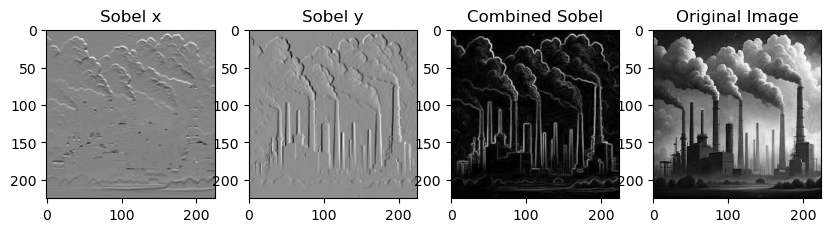

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, color, io

# Load an example image
# Make sure to replace 'your_image_file.jfif' with the actual name of your image file
# Ensure the path is correct and the file exists
image_path = 'C:\\Users\\DELL\\Desktop\\cv lab\\images (1).jfif'  # Update this line with the correct file name and extension

# Check if the file exists at the specified path
# If the file name or extension is different, update it accordingly
image = color.rgb2gray(io.imread(image_path))  # Load the image

# Apply Sobel filters
sobel_x = filters.sobel_h(image)  # Sobel filter in the x direction
sobel_y = filters.sobel_v(image)  # Sobel filter in the y direction
sobel_combined = np.hypot(sobel_x, sobel_y)  # Combine the two Sobel images

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel x')
plt.subplot(1, 4, 2), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel y')
plt.subplot(1, 4, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Combined Sobel')
plt.subplot(1, 4, 4), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.show()

<h1>lab 02</h1>

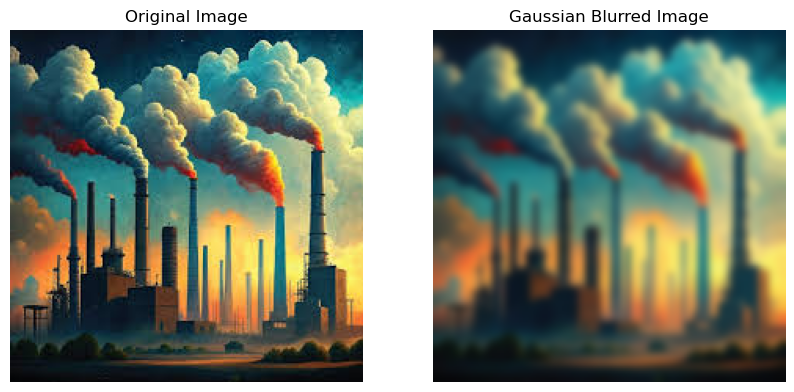

In [9]:
import cv2
import matplotlib.pyplot as plt

# Read the image
# Ensure this path is correct and points to an existing image file
image_path = 'C:\\Users\\DELL\\Desktop\\cv lab\\images (1).jfif'  # Corrected file extension and removed unnecessary characters
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    raise ValueError(f"Image not found at the path: {image_path}")

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

# Convert BGR to RGB for displaying with matplotlib
blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)

# Display the original and blurred images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image_rgb)
plt.title('Gaussian Blurred Image')
plt.axis('off')

plt.show()

<h1>lab 03</h1>


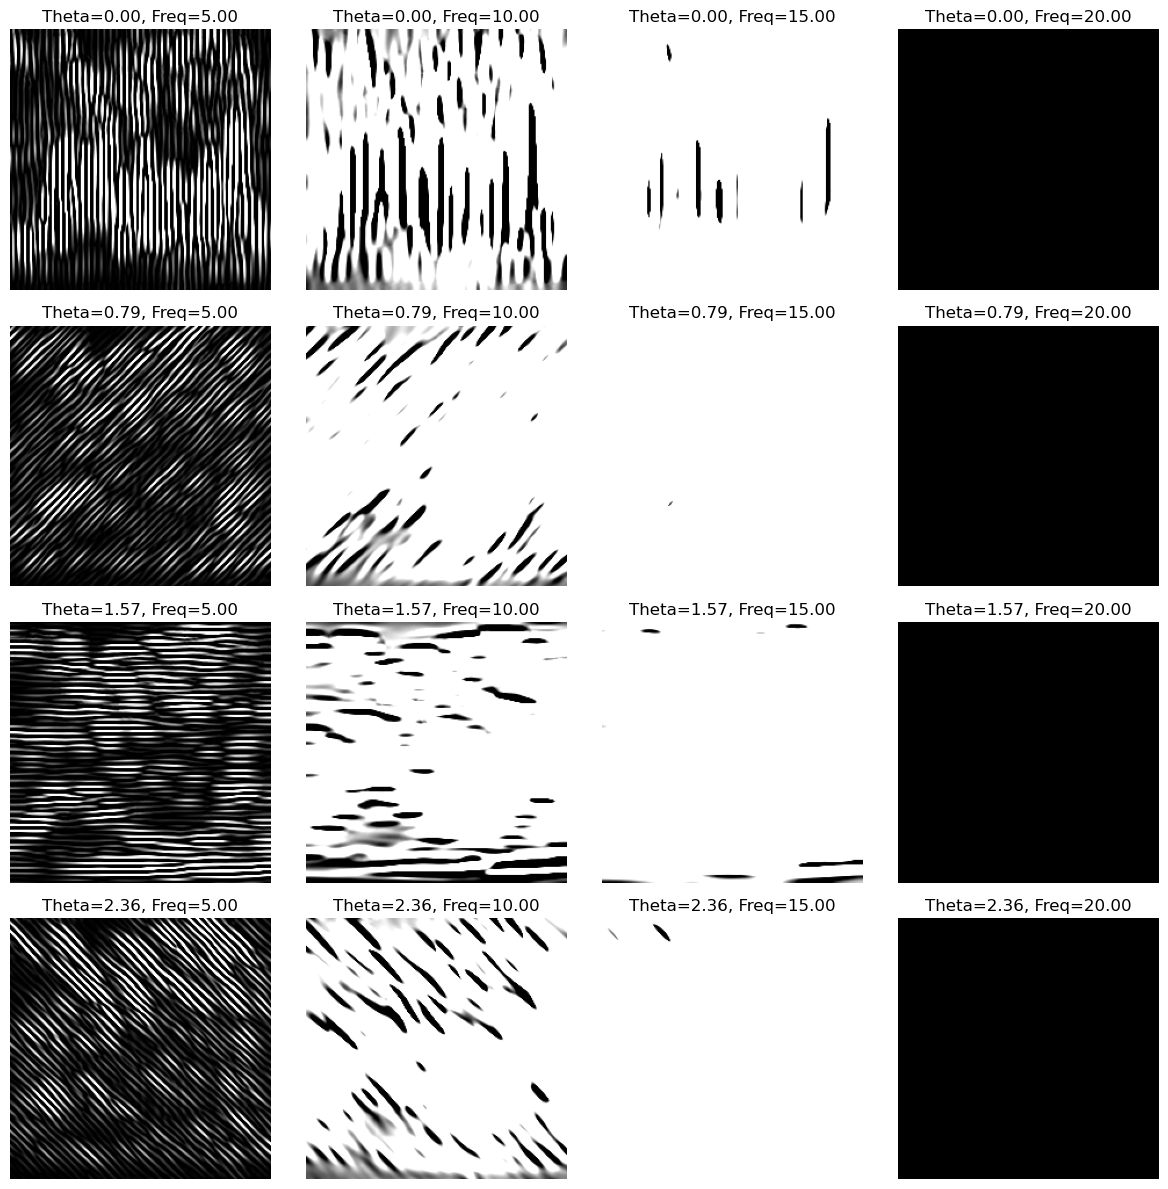

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def gabor_filter(ksize, sigma, theta, lambd, gamma, psi):
    return cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)

# Read the image
image = cv2.imread('C:\\Users\\DELL\\Desktop\\cv lab\\images (1).jfif', cv2.IMREAD_GRAYSCALE)

# Define Gabor filter parameters
ksize = 31  # Size of the filter
sigma = 4.0  # Standard deviation of the Gaussian function
lambd = 10.0  # Wavelength of the sinusoidal factor
gamma = 0.5  # Spatial aspect ratio
psi = 0  # Phase offset

# Apply Gabor filters with different orientations and frequencies
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
frequencies = [5, 10, 15, 20]

fig, axes = plt.subplots(len(angles), len(frequencies), figsize=(12, 12))
for i, theta in enumerate(angles):
    for j, lambd in enumerate(frequencies):
        kernel = gabor_filter(ksize, sigma, theta, lambd, gamma, psi)
        filtered_img = cv2.filter2D(image, cv2.CV_8UC3, kernel)
        
        axes[i, j].imshow(filtered_img, cmap='gray')
        axes[i, j].set_title(f'Theta={theta:.2f}, Freq={lambd:.2f}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


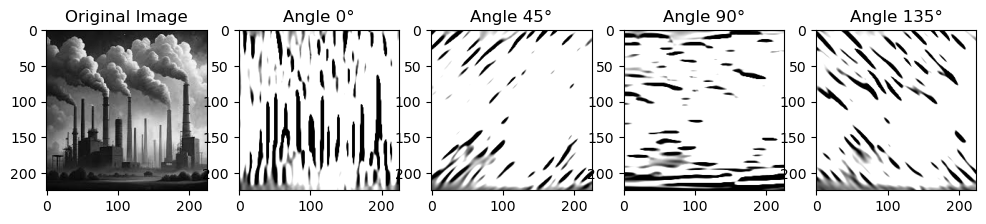

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply Gabor filter
def apply_gabor_filter(image, ksize, sigma, theta, lambd, gamma, psi):
    gabor = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor)
    return filtered_image

# Read the image
image = cv2.imread('C:\\Users\\DELL\\Desktop\\cv lab\\images (1).jfif', cv2.IMREAD_GRAYSCALE)

# Gabor filter parameters
ksize = 31  # Kernel size
sigma = 4.0  # Standard deviation of the Gaussian function
theta_values = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Orientation of the normal to the parallel stripes of a Gabor function
lambd = 10.0  # Wavelength of the sinusoidal factor
gamma = 0.5  # Spatial aspect ratio
psi = 0  # Phase offset

# Apply Gabor filter with different orientations
filtered_images = []
for theta in theta_values:
    filtered_image = apply_gabor_filter(image, ksize, sigma, theta, lambd, gamma, psi)
    filtered_images.append(filtered_image)

# Plot the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, len(theta_values) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
for i, filtered_image in enumerate(filtered_images):
    plt.subplot(1, len(theta_values) + 1, i + 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Angle {theta_values[i]*180/np.pi:.0f}°')

plt.show()

<h1>Lab 04: laplacian edge detrction </h1>

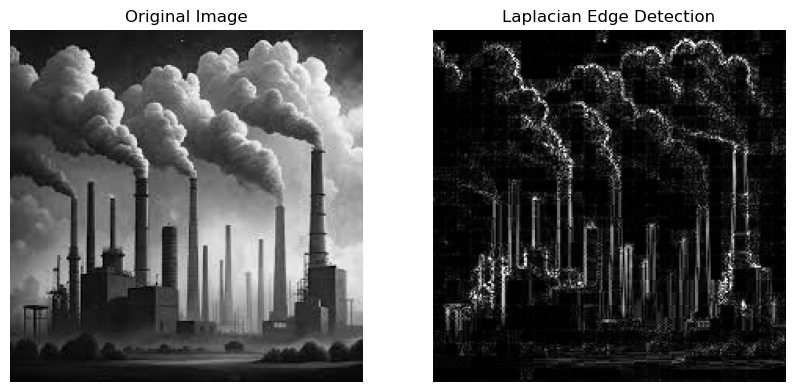

In [19]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('C:\\Users\\DELL\\Desktop\\cv lab\\images (1).jfif', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Convert back to uint8
laplacian = cv2.convertScaleAbs(laplacian)

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.show()


<h1>Lab 05: Frequency domain analysis using fourer transform</h1>

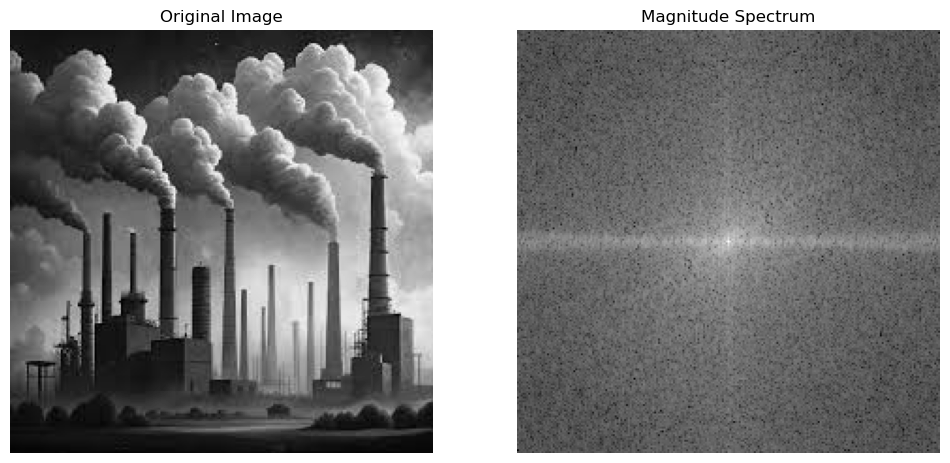

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('C:\\Users\\DELL\\Desktop\\cv lab\\images (1).jfif', cv2.IMREAD_GRAYSCALE)

# Perform Fourier Transform
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift))

# Display the original image and its magnitude spectrum
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.show()


<h1>Lab 06:non maximum supperession for edge thining</h1>

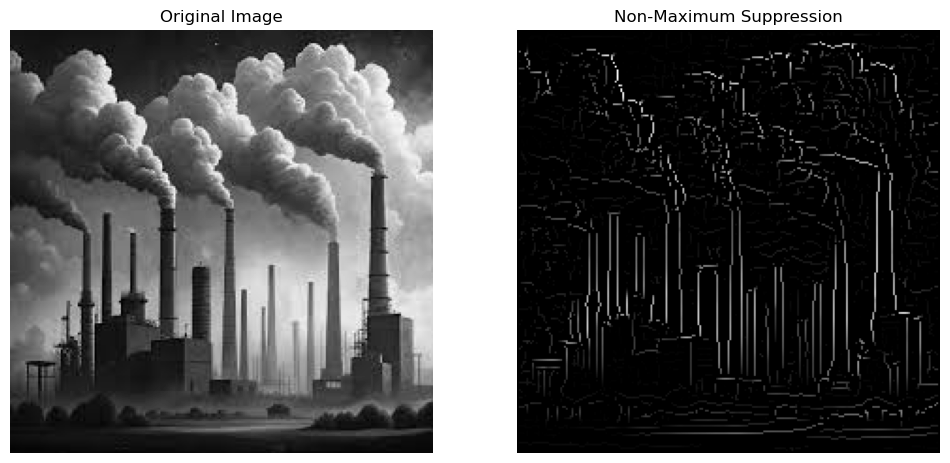

In [23]:
import cv2
import numpy as np

def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
                # Angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                # Angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                # Angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                # Angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

# Read the image
image = cv2.imread('C:\\Users\\DELL\\Desktop\\cv lab\\images (1).jfif', cv2.IMREAD_GRAYSCALE)

# Apply GaussianBlur to smooth the image
blurred = cv2.GaussianBlur(image, (5,5), 1.4)

# Compute the gradients
gx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
gy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)
magnitude = np.sqrt(gx ** 2 + gy ** 2)
angle = np.arctan2(gy, gx)

# Apply non-maximum suppression
nms_img = non_max_suppression(magnitude, angle)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(nms_img, cmap='gray')
plt.title('Non-Maximum Suppression')
plt.axis('off')

plt.show()
